In [41]:
from cascadeUtil import loadDataset
import numpy as np
import pandas as pd
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import pickle


In [11]:
def loadTimeSeriesData(protocol, subj):
    pathProt = {'IS':'IS', 'US':'US', 'Field':'Field/testdata_labeled'}
    fgFeatFolder = '../WillSense/code/WS/'+pathProt[protocol]+'/subject/'+ subj + '/'
    file = fgFeatFolder + "testdata_labeled.csv"
    fgDf = pd.read_csv(file)
    fgDf = fgDf.dropna()
    return fgDf


protocol = 'US'
subj = 'Dzung'
XY = loadTimeSeriesData(protocol, subj)
print(XY.feedingClass)

{0, 1}


In [12]:
from os import listdir

def find_csv_filenames( path_to_dir, suffix=".csv" ):
    filenames = listdir(path_to_dir)
    return [ filename for filename in filenames if filename.endswith( suffix ) ]

In [20]:
subjsIS = ['testP3','testP4','testP5','testP10','trainP3','trainP4','trainP5','trainP10']
subjsUS = ['testP1','testP3','testP6','testP7','testP8','trainP1','trainP3','trainP6','trainP7','trainP8'] 
subjsField = ['P3','P4','P5','P7','P10','P11','P12','P13','P14','P17','P18','P23','P24'] 

subjsProt = {'IS':subjsIS, 'US':subjsUS, 'Field':subjsField}
pathProt = {'IS':'IS', 'US':'US', 'Field':'Field/testdata_labeled'}



def readFeedingGesture(protocol, subj):
    
    fg_folder = '../WillSense/code/WS/'+pathProt[protocol]+'/'+subj+'/feeding_gestures/'
    
    namelist = find_csv_filenames( fg_folder, suffix=".csv" )
    n = len(namelist)
    
    df_all = pd.DataFrame()
    
    for i in range(n):
        df = pd.read_csv( fg_folder + 'fg_' + str(i) + '.csv' )
        df['ind'] = i
        df_all = pd.concat([df_all, df])
        
    df_all = df_all[['ind' , 'Time', 'Angular_Velocity_x', 'Angular_Velocity_y', 'Angular_Velocity_z', 
                    'Linear_Accel_x', 'Linear_Accel_y', 'Linear_Accel_z']]
    return df_all

df = readFeedingGesture('IS', 'testP3')

In [37]:
def plot_acc(df, ind):
    mask = df['ind'] == ind
    df = df.loc[mask]
    df_acc = df[[ 'Linear_Accel_x', 'Linear_Accel_y', 'Linear_Accel_z' ]]
    f = plt.figure(figsize=(15,5))
    styles1 = ['b-']
    df_acc.plot(style=styles1,ax=f.gca())
#     plt.title(title, color='black')
    return df_acc

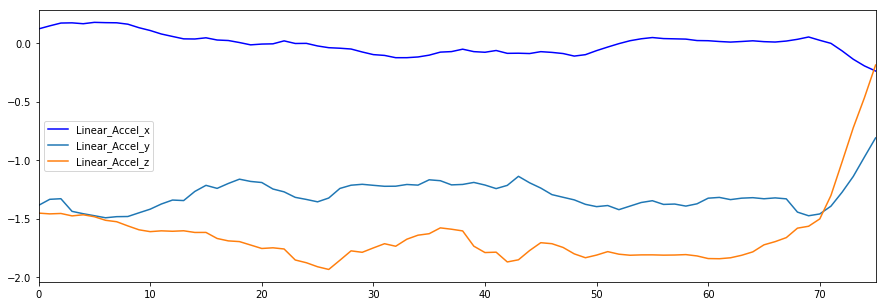

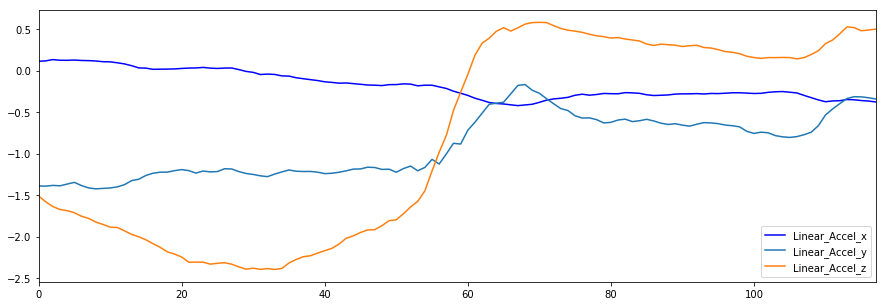

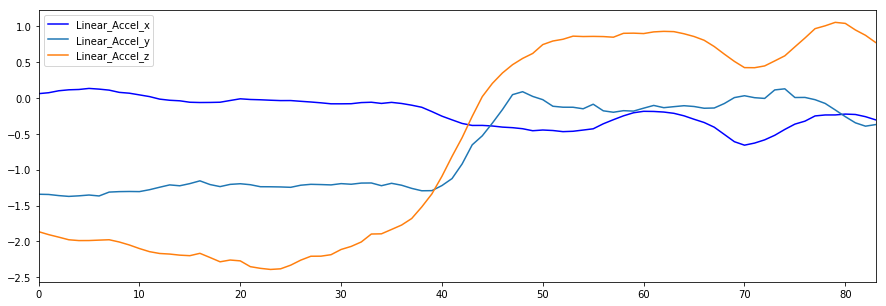

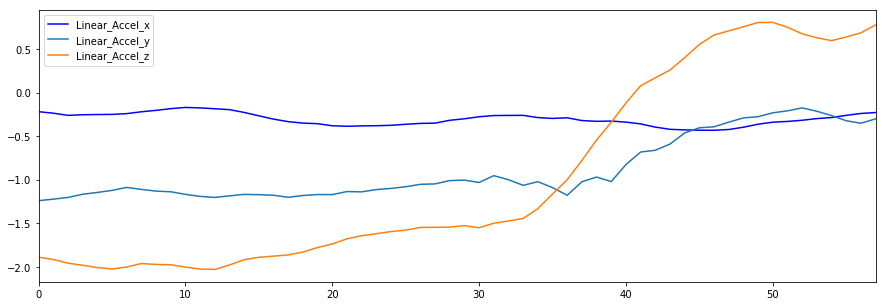

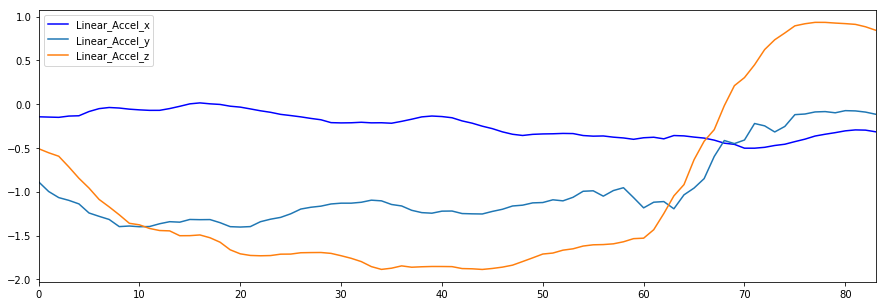

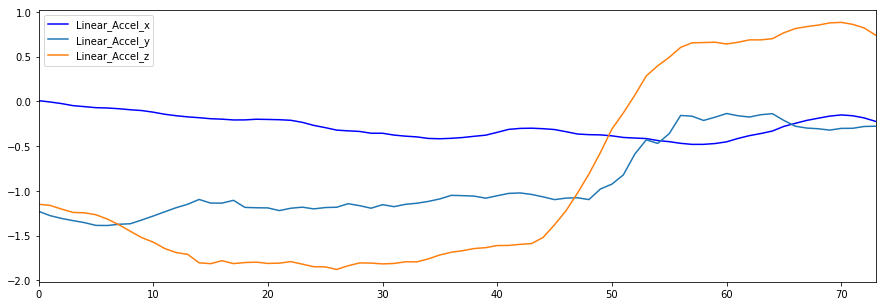

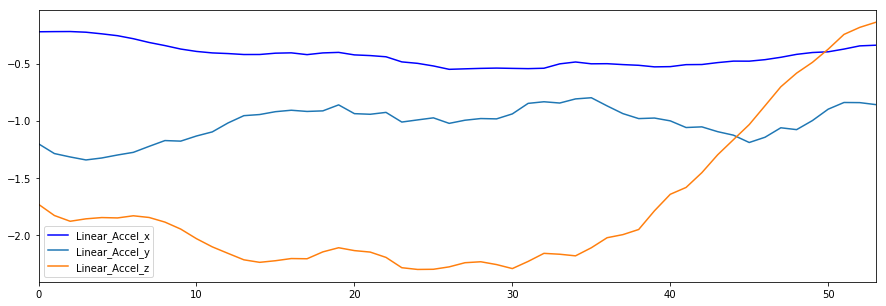

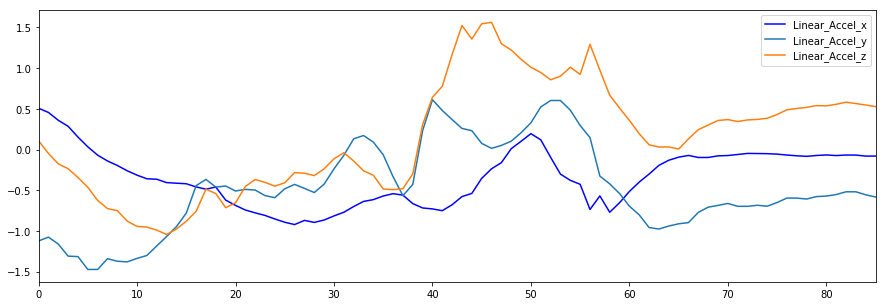

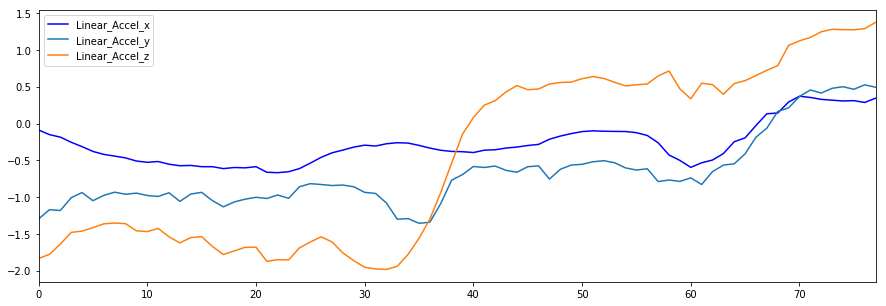

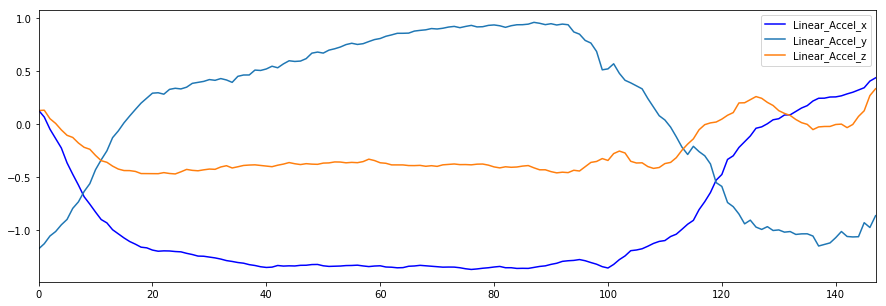

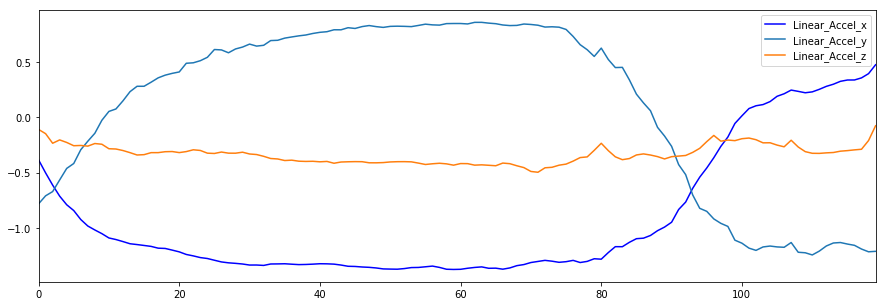

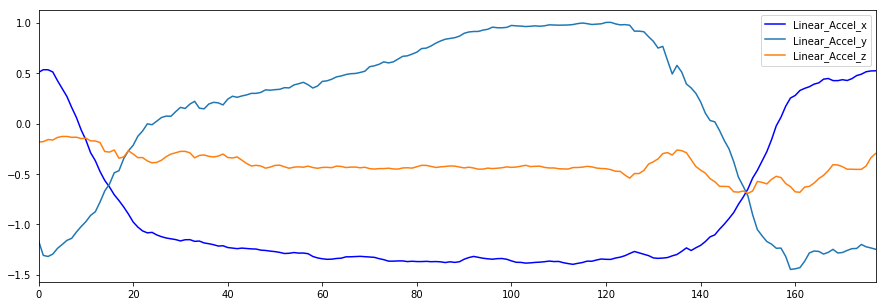

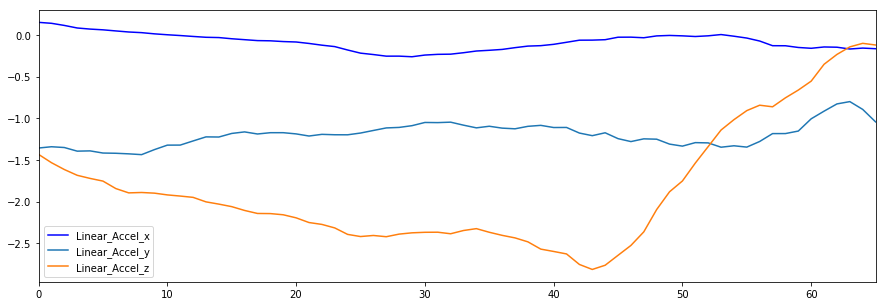

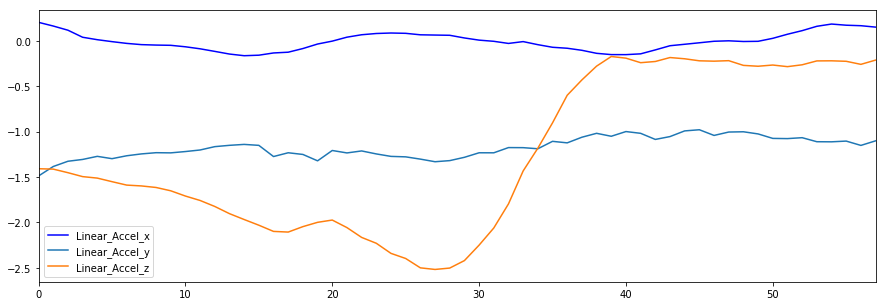

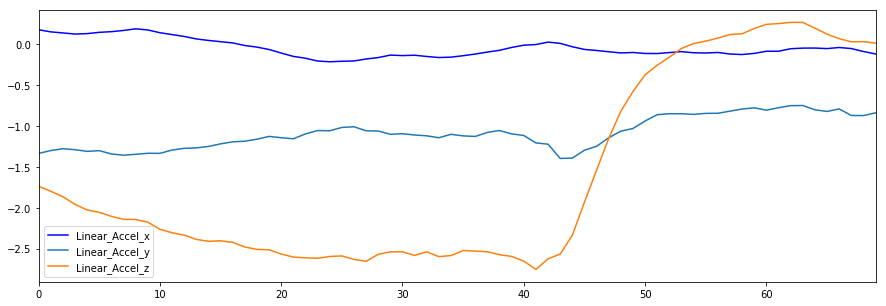

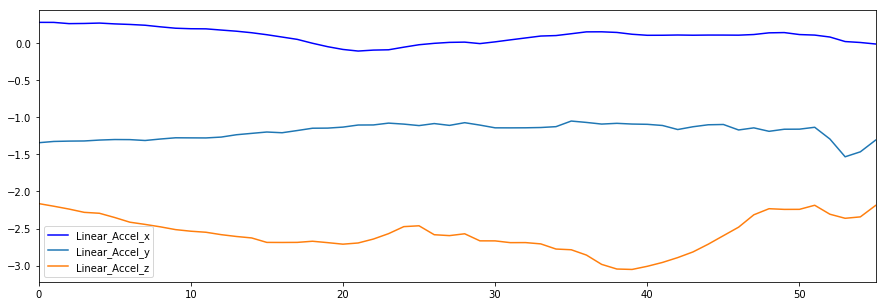

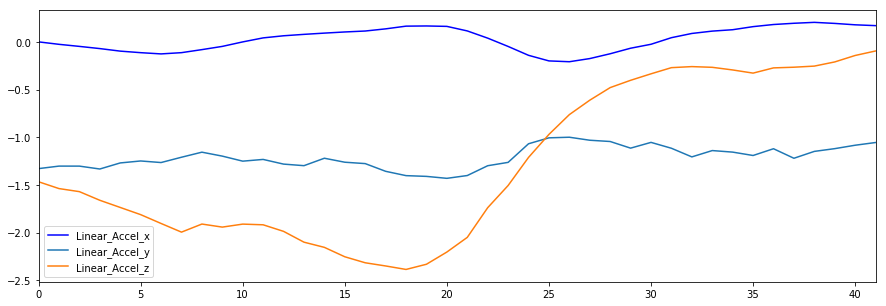

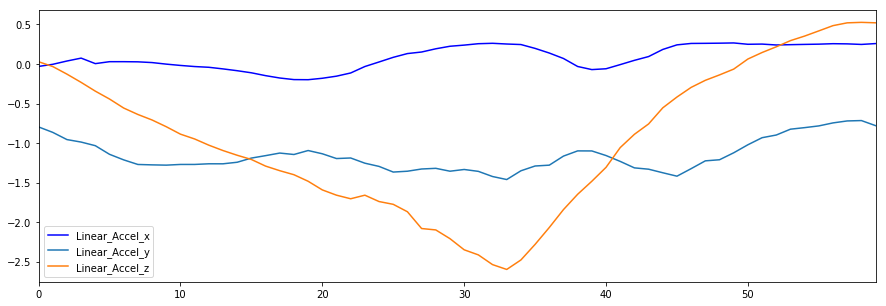

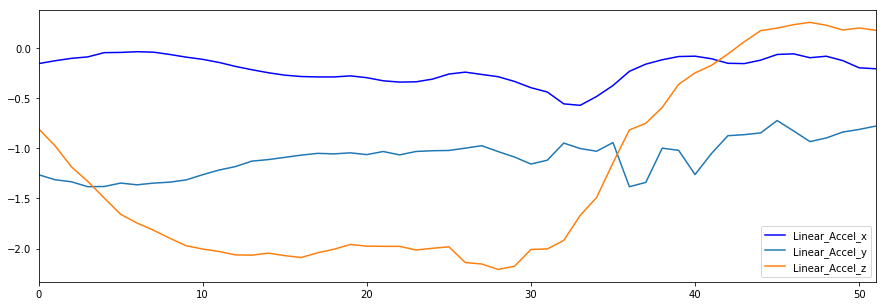

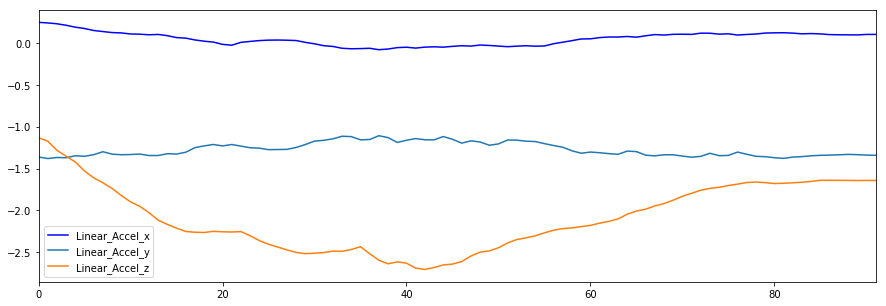

In [40]:
for i in range(20):
    plot_acc(df, i)